#Step 1: Reading in the Data

##1a) Import All Libraries

In [224]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

##1b) Setting Up Options

In [225]:
#Pandas Options
pd.set_option('display.max_colwidth', 1000,
              'display.max_rows', None,
              'display.max_columns', None)
#preventing the dataframe frrom displaying
#too long a column by setting the
#max_colwidth to 1000

#Plotting Options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

##1c) Browsing the Columns

In [226]:
loans = pd.read_csv('https://www.alvinang.sg/s/LendingClubLoan200-rows.csv')

In [227]:
loans.info()

#there are 73 columns! TOO MANY!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           199 non-null    int64  
 1   member_id                    199 non-null    int64  
 2   loan_amnt                    199 non-null    int64  
 3   funded_amnt                  199 non-null    int64  
 4   funded_amnt_inv              199 non-null    float64
 5   term                         199 non-null    object 
 6   int_rate                     199 non-null    float64
 7   installment                  199 non-null    float64
 8   grade                        199 non-null    object 
 9   sub_grade                    199 non-null    object 
 10  emp_title                    190 non-null    object 
 11  emp_length                   198 non-null    object 
 12  home_ownership               199 non-null    object 
 13  annual_inc          



---



#Step 2: Ridding Columns that have too many NaNs

##2a) Creating the Missing Fractions

In [228]:
missing_fractions = loans.\
                    isnull().\
                    mean().\
                   sort_values(ascending = False)

In [229]:
missing_fractions
#so many rows are pure empty!

inq_last_12m                   1.000000
verification_status_joint      1.000000
tot_cur_bal                    1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
dti_joint                      1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
total_rev_hi_lim               1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
annual_inc_joint               0.994975
mths_since_last_major_derog    0.994975
tot_coll_amt                   0.994975
mths_since_last_record         0.974874
next_pymnt_d                   0.929648
mths_since_last_delinq         0.763819
desc                           0.351759


##2b) Plotting the Missing Fractions

Text(0, 0.5, 'Feature Count')

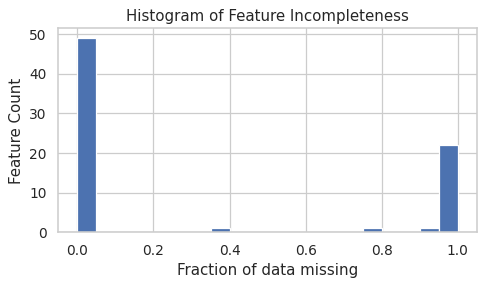

In [230]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature Count')

we see that close to 50 columns are filled with values whlie about 20+ columns have almost 100% NaNs (which means that are literally empty!)

##2c) Creating the Drop List

In [231]:
drop_list = sorted(list(
    missing_fractions[missing_fractions > 0.3].
    index))

In [232]:
import cmd
cli = cmd.Cmd()
cli.columnize(drop_list, displaywidth = 10)

all_util
annual_inc_joint
desc
dti_joint
il_util
inq_fi
inq_last_12m
max_bal_bc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
next_pymnt_d
open_acc_6m
open_il_12m
open_il_24m
open_il_6m
open_rv_12m
open_rv_24m
tot_coll_amt
tot_cur_bal
total_bal_il
total_cu_tl
total_rev_hi_lim
verification_status_joint


In [233]:
len(drop_list)
#we need to drop off 25 columns because they have
#too many NaNs

25

##2d) Drop off the Drop List

In [234]:
loans.drop(labels=drop_list, 
           axis = 1, inplace = True)

In [235]:
loans.shape
#we are left with 49 columns

(199, 49)

##2e) Show the Remaining Columns

In [236]:
sorted(loans.columns)

['acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'initial_list_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'pub_rec',
 'purpose',
 'pymnt_plan',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'verification_status',
 'zip_code']



---



#Step 3: Selecting Important Columns out of the Remaining Columns

##3a) Taking a peek at the Lending Club Loan Dictionary

In [237]:
xls = pd.read_excel('https://www.alvinang.sg/s/LCDataDictionary.xlsx', sheet_name = 'LoanStats', index_col = 'LoanStatNew')

In [238]:
xls.loc[['loan_amnt', 
         'annual_inc', 
         'collection_recovery_fee', 
         'dti', 
         'funded_amnt', 
         'funded_amnt_inv', 
         'installment', 
         'int_rate', 
         'recoveries', 
         'revol_bal', 
         'total_acc', 
         'total_pymnt', 
         'total_pymnt_inv', 
         'total_rec_int', 
         'total_rec_late_fee', 
         'total_rec_prncp']]

#from the LCL Dictionary, we see the Financial Definitions of the Column Names
#we choose the Columns above because we feel that they impact
#Loan Amount the most.

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
annual_inc,The self-reported annual income provided by the borrower during registration.
collection_recovery_fee,post charge off collection fee
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
installment,The monthly payment owed by the borrower if the loan originates.
int_rate,Interest Rate on the loan
recoveries,post charge off gross recovery


##3b) Creating a New Keep List

In [239]:
keep_list = ['loan_amnt', 
             'annual_inc', 
             'collection_recovery_fee', 
             'dti', 
             'funded_amnt', 
             'funded_amnt_inv', 
             'installment', 
             'int_rate', 
             'recoveries', 
             'revol_bal', 
             'total_acc', 
             'total_pymnt', 
             'total_pymnt_inv', 
             'total_rec_int', 
             'total_rec_late_fee', 
             'total_rec_prncp']

len(keep_list)
#we will keep 16 columns out of the 49 remaining

16

##3c) Drop Off the Unimportant  / Unwanted Columns

In [240]:
new_drop_list = [col for col in loans.columns if col not in keep_list]

In [241]:
len(new_drop_list)
#we want to drop off 33 columns

33

In [242]:
loans.drop(labels=new_drop_list, axis = 1, inplace = True)

In [243]:
sorted(loans.columns)
#this is what we have left after dropping 33 unwanted columns

['annual_inc',
 'collection_recovery_fee',
 'dti',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'int_rate',
 'loan_amnt',
 'recoveries',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp']

In [244]:
loans.shape
#we obtain our 16 Wanted columns

(199, 16)



---



#Step 4: Find the TOP 5 Important Features using Random Forest Classifier

In [245]:
X = loans[['annual_inc', 
         'collection_recovery_fee', 
         'dti', 
         'funded_amnt', 
         'funded_amnt_inv', 
         'installment', 
         'int_rate', 
         'recoveries', 
         'revol_bal', 
         'total_acc', 
         'total_pymnt', 
         'total_pymnt_inv', 
         'total_rec_int', 
         'total_rec_late_fee', 
         'total_rec_prncp']]

#we take all our wanted 15 columns but we leave out
#'loan_amnt' because that belongs to y

In [246]:
X_index = pd.DataFrame (X.columns)

In [247]:
X_index

,0
0,annual_inc
1,collection_recovery_fee
2,dti
3,funded_amnt
4,funded_amnt_inv
5,installment
6,int_rate
7,recoveries
8,revol_bal
9,total_acc


In [248]:
y = loans['loan_amnt']

##4a) Check that All Columns are of Numeric Type before Feeding into the Classifier

In [249]:
X.dtypes
#we see that the only column of "string" type is 'dti'

annual_inc                 float64
collection_recovery_fee    float64
dti                         object
funded_amnt                  int64
funded_amnt_inv            float64
installment                float64
int_rate                   float64
recoveries                 float64
revol_bal                    int64
total_acc                  float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_int              float64
total_rec_late_fee         float64
total_rec_prncp            float64
dtype: object

In [250]:
X['dti'] = X['dti'].astype(float)
#we need to convert 'dti' column to 'float' in order to feed the 
#Random Forest Classifier 

#however, there seems to an error pop up 
#where a word 'CA' is found in one of the rows.....
#(we dunno which row nor which column!)

ValueError: ignored

In [251]:
X.loc[X['dti'] =='CA']
#Row 36 is dirty....

,annual_inc,collection_recovery_fee,dti,funded_amnt,funded_amnt_inv,installment,int_rate,recoveries,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
36,55596.0,0.0,CA,10800,10800.0,348.03,9.91,0.0,0,13.3,0.0,12157.2,10800.0,1357.2,12157.2


##4b) Cleanse Characters into Numbers

In [252]:
X['dti'].iloc[34: 38]
#we check the surrounding row numbers values...

34    6.35
35    11.8
36      CA
37    8.48
Name: dti, dtype: object

In [253]:
X['dti'].iloc[36]

'CA'

In [254]:
X['dti'].iloc[36] = 10
#since 'dti' row 36 is 'CA' and we need to change to a number
#we decide upon 10 because its between 11.8 and 8.48

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [255]:
X['dti'].iloc[36]

10

In [256]:
X['dti'] = X['dti'].astype(float)
#we need to convert 'dti' column to 'float' in order to feed the 
#Random Forest Classifier 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
X.dtypes
#Finally! all columns are now numbers!

annual_inc                 float64
collection_recovery_fee    float64
dti                        float64
funded_amnt                  int64
funded_amnt_inv            float64
installment                float64
int_rate                   float64
recoveries                 float64
revol_bal                    int64
total_acc                  float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_int              float64
total_rec_late_fee         float64
total_rec_prncp            float64
dtype: object

##4c) Create Random Forest Classifier

In [258]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
#n_estimators stands for the no. of trees in the forest
#we use 100 trees here

clf.fit(X, y)


RandomForestClassifier()

##4d) Find Important Features

In [259]:
clf.feature_importances_

array([0.06060857, 0.01142957, 0.04984586, 0.15068175, 0.14645094,
       0.10291792, 0.0456518 , 0.0133651 , 0.04882682, 0.04138062,
       0.08186602, 0.0870414 , 0.05942668, 0.00573743, 0.09476953])

In [260]:
feature_imp = pd.Series(clf.feature_importances_, index = X_index).sort_values(ascending = False)

In [261]:
feature_imp

(funded_amnt,)                0.150682
(funded_amnt_inv,)            0.146451
(installment,)                0.102918
(total_rec_prncp,)            0.094770
(total_pymnt_inv,)            0.087041
(total_pymnt,)                0.081866
(annual_inc,)                 0.060609
(total_rec_int,)              0.059427
(dti,)                        0.049846
(revol_bal,)                  0.048827
(int_rate,)                   0.045652
(total_acc,)                  0.041381
(recoveries,)                 0.013365
(collection_recovery_fee,)    0.011430
(total_rec_late_fee,)         0.005737
dtype: float64

##4e) Plot Important Features

No handles with labels found to put in legend.


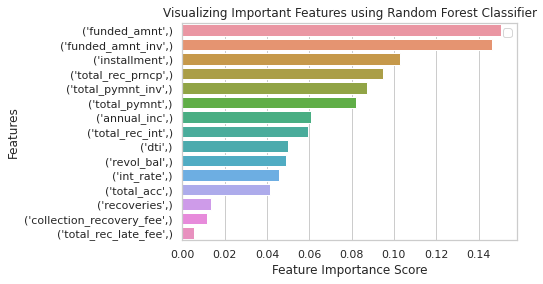

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features using Random Forest Classifier')
plt.legend()
plt.show()

From the Random Forest Classifier, we see that the TOP 5 important columns are:
- Funded Amount
- Funded Amount Inventory
- Installment
- Total Received Principle
- Total Payment



---



#Step 5: Cross check the TOP 5 Important Features using Multiple Regression

##5a) Create Multiple Regression Model

In [263]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              loan_amnt   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              856.5
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                   2.24e-161
Time:                        08:28:11   Log-Likelihood:                         -1748.4
No. Observations:                 199   AIC:                                      3527.
Df Residuals:                     184   BIC:                                      3576.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
annual_inc                  0.0013      0.005      0.262      0.794      -0.009       0.011
collection_recovery_fee     5.4032      5.495      0.983      0.327      -5.437      16.244
dti                       -20.6412     20.285     -1.018      0.310     -60.662      19.379
funded_amnt                 1.3663      0.294      4.647      0.000       0.786       1.946
funded_amnt_inv            -0.3063      0.284     -1.079      0.282      -0.866       0.254
installment                -5.2592      2.817     -1.867      0.064     -10.818       0.299
int_rate                   34.8507     28.326      1.230      0.220     -21.034      90.735
recoveries                  1.4365      1.566      0.918      0.360      -1.652       4.525
revol_bal                   0.0059      0.013      0.441      0.660      -0.021       0.032
total_acc                   1.8305     14.041      0.130      0.896     -25.871      29.532
total_pymnt                -1.5189      1.258     -1.207      0.229      -4.001       0.964
total_pymnt_inv             0.4512      0.248      1.819      0.070      -0.038       0.940
total_rec_int               1.1946      1.290      0.926      0.356      -1.351       3.740
total_rec_late_fee        -23.1294     21.396     -1.081      0.281     -65.342      19.083
total_rec_prncp             1.1475      1.272      0.902      0.368      -1.362       3.657
==============================================================================
Omnibus:                      227.998   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8010.921
Skew:                           4.662   Prob(JB):                         0.00
Kurtosis:                      32.651   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##5b) Create a Dataframe to Store P-Values

In [264]:
import pandas as pd 
# list of strings 
lst1 = ['annual_inc', 
         'collection_recovery_fee', 
         'dti', 
         'funded_amnt', 
         'funded_amnt_inv', 
         'installment', 
         'int_rate', 
         'recoveries', 
         'revol_bal', 
         'total_acc', 
         'total_pymnt', 
         'total_pymnt_inv', 
         'total_rec_int', 
         'total_rec_late_fee', 
         'total_rec_prncp']
# list of int 
lst2 = [0.794, 0.327, 0.31, 0, 0.282, 0.064, 0.22, 0.36, 0.66, 0.896, 0.229, 0.07, 0.356, 0.281, 0.368] 
# Calling DataFrame after zipping both lists, with columns specified 
df = pd.DataFrame(list(zip(lst1, lst2)), columns =['X', 'P-value']) 


In [265]:
 result = df.sort_values(by="P-value", ascending=True)
 result

,X,P-value
3,funded_amnt,0.000
5,installment,0.064
11,total_pymnt_inv,0.070
6,int_rate,0.220
10,total_pymnt,0.229
13,total_rec_late_fee,0.281
4,funded_amnt_inv,0.282
2,dti,0.310
1,collection_recovery_fee,0.327
12,total_rec_int,0.356


##5c) Plot Important Features

No handles with labels found to put in legend.


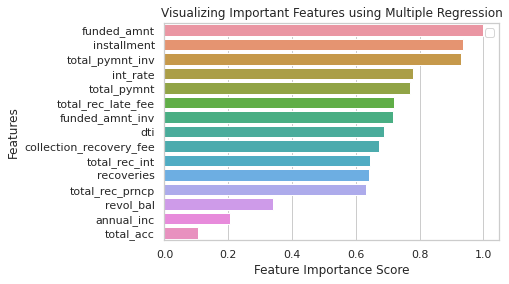

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x = 1 - result['P-value'], y = result['X'])

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features using Multiple Regression')
plt.legend()
plt.show()

From the Mutliple Regression Model, we see that the TOP 5 important columns are:
- Funded Amount
- Installment
- Total Payment Inventory
- Interest Rate
- Total Payment



---



#Step 6: Fish Out Those Important Columns that are Shared Between "Random Forest Classifier" and "Multiple Regression" 

From the Random Forest Classifier, we see that the TOP 5 important columns are:
- Funded Amount
- Funded Amount Inventory
- Installment
- Total Received Principle
- Total Payment



From the Mutliple Regression Model, we see that the TOP 5 important columns are:
- Funded Amount
- Installment
- Total Payment Inventory
- Interest Rate
- Total Payment

In [ ]:
#The shared TOP Columns are:
#No. 1 --> Funded Amount
#No. 2 --> Installment
#No. 3 --> Total Payment



---



#THE END